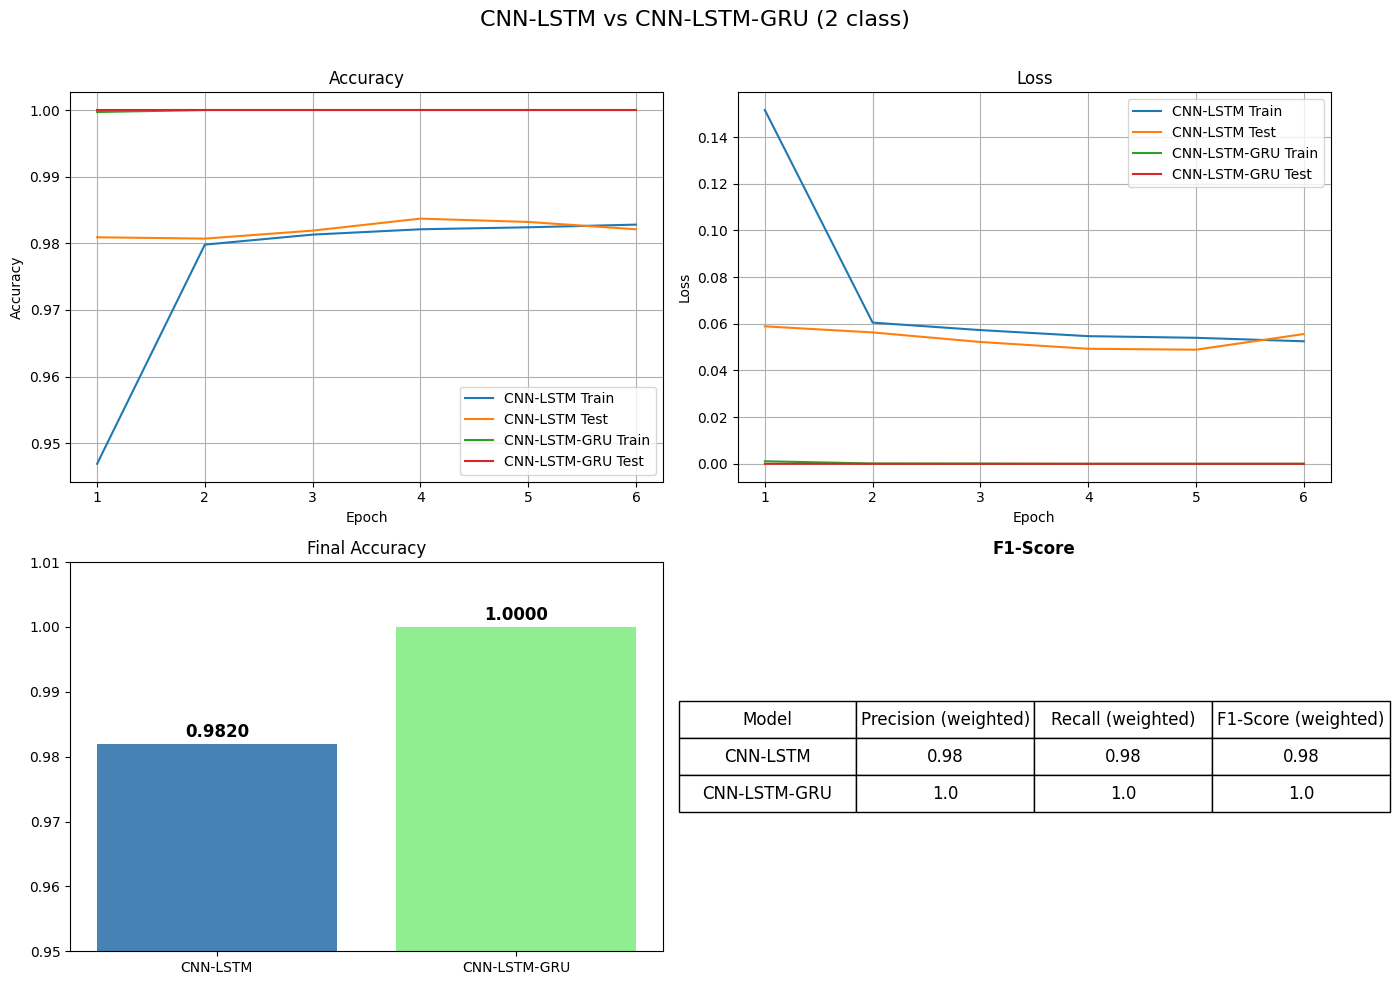

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# CNN-LSTM
cnn_lstm_epochs = np.arange(1, 7)
cnn_lstm_train_acc = [0.9469, 0.9798, 0.9813, 0.9821, 0.9824, 0.9828]
cnn_lstm_test_acc = [0.9809, 0.9807, 0.9819, 0.9837, 0.9832, 0.9821]
cnn_lstm_train_loss = [0.1516, 0.0605, 0.0573, 0.0547, 0.0540, 0.0525]
cnn_lstm_test_loss = [0.0589, 0.0563, 0.0522, 0.0493, 0.0489, 0.0556]
cnn_lstm_final_test_acc = 0.9820
cnn_lstm_final_test_loss = 0.0559

# CNN-LSTM-GRU
cnn_lstm_gru_epochs = np.arange(1, 7)
cnn_lstm_gru_train_acc = [0.9997, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
cnn_lstm_gru_test_acc = [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
cnn_lstm_gru_train_loss = [0.0011, 0.0001306, 0.000081947, 2.1156e-10, 1.4664e-11, 7.5520e-11]
cnn_lstm_gru_test_loss = [6.0838e-07, 4.6583e-11, 1.1399e-15, 4.3320e-19, 7.3978e-20, 7.3541e-21]
cnn_lstm_gru_final_test_acc = 1.0000
cnn_lstm_gru_final_test_loss = 0.0000


fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("CNN-LSTM vs CNN-LSTM-GRU (2 class)", fontsize=16)

# accuracy
axs[0, 0].plot(cnn_lstm_epochs, cnn_lstm_train_acc, label='CNN-LSTM Train')
axs[0, 0].plot(cnn_lstm_epochs, cnn_lstm_test_acc, label='CNN-LSTM Test')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_acc, label='CNN-LSTM-GRU Train')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_test_acc, label='CNN-LSTM-GRU Test')
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].legend()
axs[0, 0].grid(True)

# loss
axs[0, 1].plot(cnn_lstm_epochs, cnn_lstm_train_loss, label='CNN-LSTM Train')
axs[0, 1].plot(cnn_lstm_epochs, cnn_lstm_test_loss, label='CNN-LSTM Test')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_loss, label='CNN-LSTM-GRU Train')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_test_loss, label='CNN-LSTM-GRU Test')
axs[0, 1].set_title("Loss")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Loss")
axs[0, 1].legend()
axs[0, 1].grid(True)

# accuracy table
models = ['CNN-LSTM', 'CNN-LSTM-GRU']
test_accs = [cnn_lstm_final_test_acc, cnn_lstm_gru_final_test_acc]
axs[1, 0].bar(models, test_accs, color=['steelblue', 'lightgreen'])
axs[1, 0].set_title("Final Accuracy")
axs[1, 0].set_ylim([0.95, 1.01])
for i, acc in enumerate(test_accs):
    axs[1, 0].text(i, acc + 0.001, f"{acc:.4f}", ha='center', fontsize=12, fontweight='bold')

# f1 table
f1_table = pd.DataFrame({
    "Model": models,
    "Precision (weighted)": [0.98, 1.00],
    "Recall (weighted)": [0.98, 1.00],
    "F1-Score (weighted)": [0.98, 1.00]
})
axs[1, 1].axis('off')
table = axs[1, 1].table(cellText=f1_table.values, colLabels=f1_table.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2.0)
axs[1, 1].set_title("F1-Score", fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
